In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('summary.csv')

In [3]:
baseline = df.iloc[0]
print(baseline)

status                             ok
partition                           1
bench          baseline:gemm-baseline
bram_used                          44
dsp_used                            3
lut_used                         1535
lutmem_used                       137
reg_used                         2642
uram_used                           0
runtime_avg                   10.4164
runtime_std                0.00853253
Name: 0, dtype: object


In [4]:
info_keys = [ 
    'partition',
]
keys = [
    'bram_used',
    'dsp_used',
    'reg_used',
    'runtime_avg',
]

In [5]:
normalized_df = df.copy()
for key in keys:
    norm_val = baseline[key]
    normalized_df[key] = normalized_df[key].apply(lambda v: v / norm_val)
normalized_df = normalized_df[info_keys + keys]
print(normalized_df)

   partition  bram_used  dsp_used  reg_used  runtime_avg
0          1   1.000000       1.0  1.000000     1.000000
1          2   1.045455       1.0  0.956472     1.049282
2          3   1.340909       2.0  1.164269     1.264319
3          4   1.113636       1.0  0.956472     1.050145
4          5   1.386364       2.0  1.162377     1.264231
5          6   1.659091       2.0  1.161998     1.263936
6          7   1.931818       2.0  1.179788     1.263401
7          8   1.113636       1.0  0.956851     1.055630
8          9   1.250000       2.0  1.155185     1.270307
9         10   1.386364       2.0  1.155564     1.271299


In [6]:
long = pd.melt(normalized_df, id_vars=['partition'], var_name='metrics', value_name='values')
long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
partition    40 non-null int64
metrics      40 non-null object
values       40 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.0+ KB


Text(0, 0.5, 'Partitioning Factor')

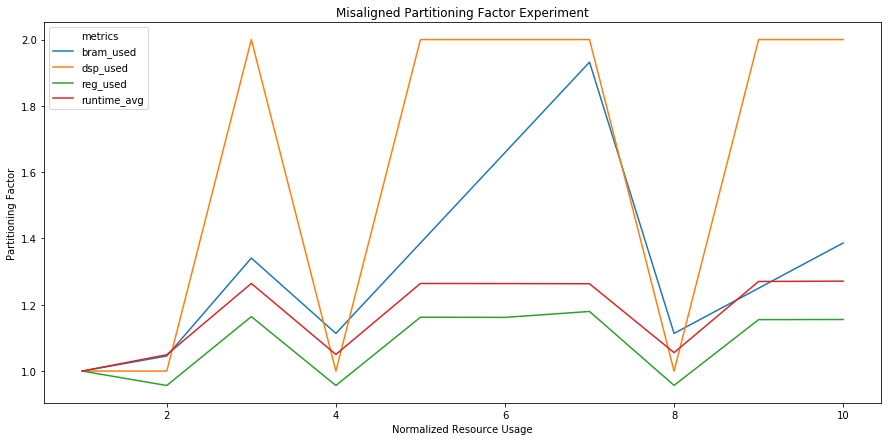

In [7]:
plt.figure(figsize=(15, 7))
plot = sns.lineplot(x='partition', y='values', hue='metrics', data=long)
plot.set_title('Misaligned Partitioning Factor Experiment')
plot.set_xlabel('Normalized Resource Usage')
plot.set_ylabel('Partitioning Factor')

In [13]:
plot.figure.savefig('normalized_resources.png', dpi=300)